## Liens utiles 
https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/ <br>
https://www.geeksforgeeks.org/data-analysis/exploratory-data-analysis-in-python/

## Import des librairies 

In [49]:
import pandas as pd 
import seaborn as sns 

In [50]:
df = pd.read_csv("movies.csv")

## Statégie universelle de nettoyage (Data Cleaning)

### 1 - Inspection structurelle 

In [51]:
print(f"Nb ligne : {df.shape[0]}, Nb colonne : {df.shape[1]} \n") # Lignes / Colonnes
print(df.info())

Nb ligne : 9999, Nb colonne : 9 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None


In [52]:
print(df.head())

                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 NaN   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the events of Army 

### 2 - Analyse des valeurs manquantes 

In [53]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [54]:
df.isnull().mean()

MOVIES      0.000000
YEAR        0.064406
GENRE       0.008001
RATING      0.182018
ONE-LINE    0.000000
STARS       0.000000
VOTES       0.182018
RunTime     0.295830
Gross       0.953995
dtype: float64

In [57]:
(df.isnull().sum()/(len(df)))*100 # pourcentage de valeur manquante dans chaque colonne

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

## Analyse des distributions (EDA visuelle - Exploratory Data Analysis)

In [34]:
df.describe() # le résultat me décrit les données uniquement sur les valeurs numériques 

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


<Axes: xlabel='RATING'>

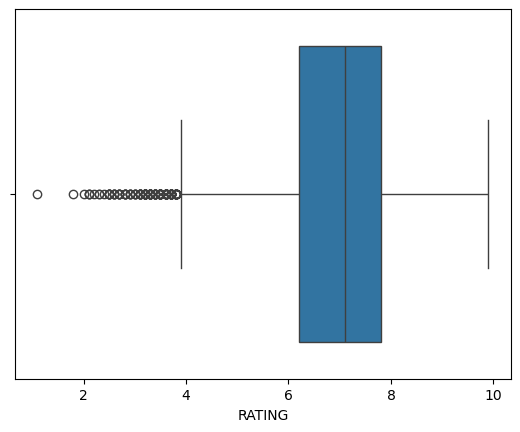

In [35]:
sns.boxplot(x=df["RATING"])

## 4 - Détection des incohérences 

In [43]:
df["RATING"].value_counts()

RATING
6.4    31
6.5    24
7.3    23
6.3    21
6.6    20
7.1    20
6.7    17
6.2    17
5.7    17
7.4    16
6.8    16
7.0    16
7.2    16
7.6    15
7.7    15
6.1    12
5.4    12
7.5    12
5.9    11
6.9    11
8.1    10
7.8    10
6.0    10
5.5     9
5.3     8
5.8     7
8.0     7
5.6     6
7.9     6
8.2     5
5.1     5
5.2     5
8.3     3
4.6     2
3.8     2
4.5     2
8.6     2
4.9     2
8.4     2
4.8     2
4.2     2
4.7     1
3.9     1
4.3     1
4.4     1
3.7     1
3.5     1
8.8     1
8.7     1
8.5     1
8.9     1
3.1     1
Name: count, dtype: int64

## 5 - Nettoyage ciblé 

In [44]:
df = df.dropna()
df["RATING"] = df["RATING"].clip(0,10)

## 6 - Validation finale

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 77 to 6292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    460 non-null    object 
 1   YEAR      460 non-null    object 
 2   GENRE     460 non-null    object 
 3   RATING    460 non-null    float64
 4   ONE-LINE  460 non-null    object 
 5   STARS     460 non-null    object 
 6   VOTES     460 non-null    object 
 7   RunTime   460 non-null    float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 35.9+ KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RATING,460.0,6.638043,0.940894,3.1,6.1,6.6,7.3,8.9
RunTime,460.0,106.436957,21.380930,24.0,93.0,103.0,116.0,228.0
